**Graphene Lattice**

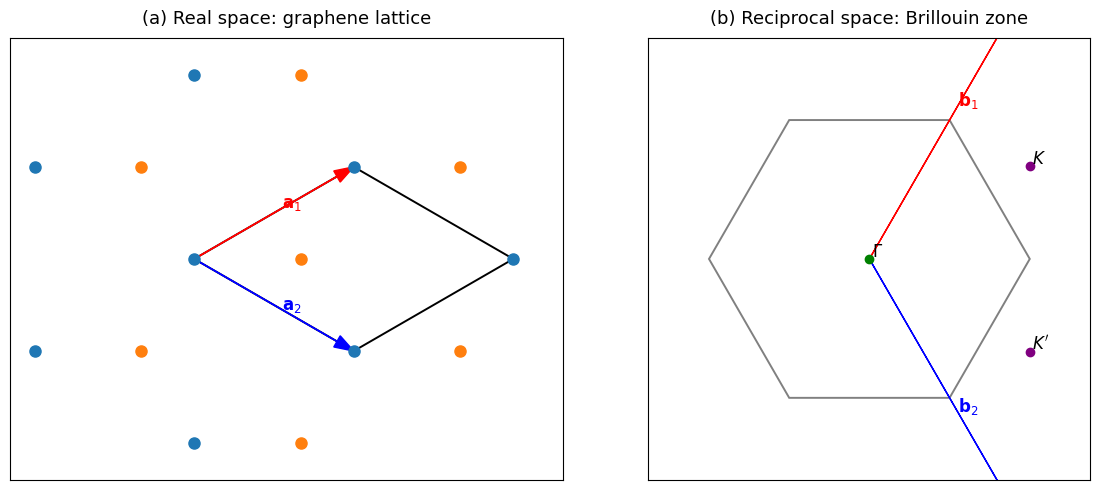

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, FancyArrowPatch

# ============ LATTICE PARAMETERS ============
a = 1.0  # set real-space lattice constant for visualization
a1 = np.array([np.sqrt(3)/2,  1/2]) * a
a2 = np.array([np.sqrt(3)/2, -1/2]) * a

# Sublattice positions inside the unit cell
A = np.array([0, 0])
B = np.array([1/np.sqrt(3), 0]) * a

# Real-space unit cell
unit_cell = np.array([A, A + a1, A + a1 + a2, A + a2])

# ============ RECIPROCAL SPACE PARAMETERS ============
# Construct reciprocal vectors
area = a1[0]*a2[1] - a1[1]*a2[0]
b1 = 2 * np.pi * np.array([ a2[1], -a2[0]]) / area
b2 = 2 * np.pi * np.array([-a1[1],  a1[0]]) / area

# First Brillouin zone (hexagon)
bz = np.array([
    b1/2,
    b1/2 + b2/2,
    b2/2,
    -b1/2,
    -b1/2 - b2/2,
    -b2/2
])

# High-symmetry points
Gamma = np.array([0, 0])
K = (2*b1 + b2) / 3
Kp = (b1 + 2*b2) / 3

# ============ PLOTTING ============
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---------------- REAL SPACE ----------------
ax = axes[0]

# Plot several unit cells to show honeycomb
for i in range(-1, 2):
    for j in range(-1, 2):
        R = i*a1 + j*a2
        ax.plot(*(R + A), 'o', color='tab:blue', markersize=8)   # A sublattice
        ax.plot(*(R + B), 'o', color='tab:orange', markersize=8) # B sublattice

# Draw unit cell
poly = Polygon(unit_cell, closed=True, fill=False, edgecolor='black', linewidth=1.4)
ax.add_patch(poly)

# Primitive vectors
ax.arrow(A[0], A[1], a1[0], a1[1],
         head_width=0.07, length_includes_head=True,
         color='red')
ax.text(*(A + a1*0.55), r"$\mathbf{a}_1$", color='red', fontsize=12)

ax.arrow(A[0], A[1], a2[0], a2[1],
         head_width=0.07, length_includes_head=True,
         color='blue')
ax.text(*(A + a2*0.55), r"$\mathbf{a}_2$", color='blue', fontsize=12)

ax.set_aspect('equal')
ax.set_title("(a) Real space: graphene lattice", fontsize=13, pad=10)
ax.set_xlim(-1.0, 2.0)
ax.set_ylim(-1.2, 1.2)
ax.set_xticks([])
ax.set_yticks([])

# ---------------- RECIPROCAL SPACE ----------------
ax = axes[1]

# Reciprocal lattice points
for i in range(-1, 2):
    for j in range(-1, 2):
        G = i*b1 + j*b2
        ax.plot(G[0], G[1], 'o', color='black', markersize=4)

# First Brillouin zone
bz_poly = Polygon(bz, closed=True, fill=False, edgecolor='gray', linewidth=1.4)
ax.add_patch(bz_poly)

# Primitive reciprocal vectors
ax.arrow(0, 0, b1[0], b1[1],
         head_width=0.2, length_includes_head=True, color='red')
ax.text(*(b1*0.55), r"$\mathbf{b}_1$", color='red', fontsize=12)

ax.arrow(0, 0, b2[0], b2[1],
         head_width=0.2, length_includes_head=True, color='blue')
ax.text(*(b2*0.55), r"$\mathbf{b}_2$", color='blue', fontsize=12)

# High symmetry points
ax.plot(Gamma[0], Gamma[1], 'o', color='green')
ax.text(*(Gamma + np.array([0.05,0.05])), r"$\Gamma$", fontsize=12)

ax.plot(K[0], K[1], 'o', color='purple')
ax.text(*(K + np.array([0.05,0.05])), r"$K$", fontsize=12)

ax.plot(Kp[0], Kp[1], 'o', color='purple')
ax.text(*(Kp + np.array([0.05,0.05])), r"$K'$", fontsize=12)

ax.set_aspect('equal')
ax.set_title("(b) Reciprocal space: Brillouin zone", fontsize=13, pad=10)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()


# Save figure
# plt.savefig("graphene_lattice.png", dpi=300, bbox_inches="tight")
plt.show()